# K- Means Clustering with Python Scikit Learn.

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement K- Means Clustering.

# K- Means Clustering

In this task we will the optimum number of clusters and represent it visually

# Author - Ashutosh Tiwari

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [107]:
iris = pd.read_csv('Iris.csv')

In [108]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [109]:
iris.drop(['Id'], axis = 1, inplace=True)

In [110]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [111]:
# Lets check for datatypes
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [112]:
# Getting the Statistical Information
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [113]:
#finding the unique value
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [114]:
#Checking is there any null value present or not
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Using Pairplots for better understanding of the data points distribution

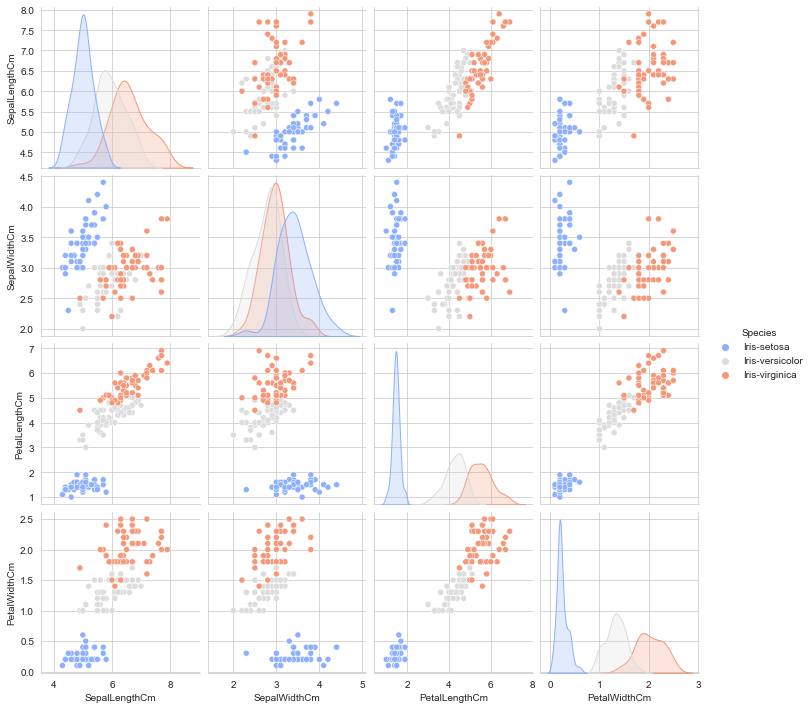

In [115]:
sns.pairplot(data=iris, hue='Species', palette = 'coolwarm')
plt.show()

From above visuals iris-setosa is easily separable from the other two

<AxesSubplot:>

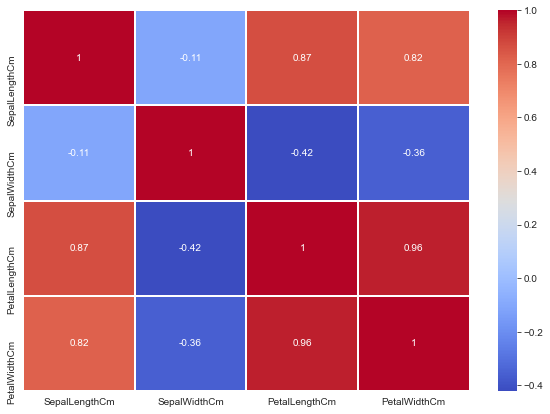

In [116]:
plt.figure(figsize = (10,7))
sns.heatmap(iris.corr(), annot=True, linewidths=1, cmap='coolwarm')

In [117]:
from sklearn.cluster import KMeans

features = iris.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]

In [118]:
#features = iris[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]

In [119]:
wcss = []

feature = iris.iloc[:, [0, 1, 2, 3]].values

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(feature)
    wcss.append(kmeans.inertia_)
    


# Using Elbow graph to find optimum no. of Clusters

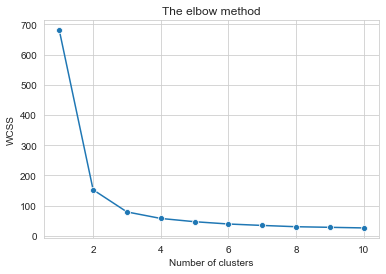

In [120]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
sns.set_style('whitegrid')
sns.lineplot(x = range(1, 11), y = wcss, marker = 'o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

In [121]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters=3, init='k-means++',  max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(feature)

In [122]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

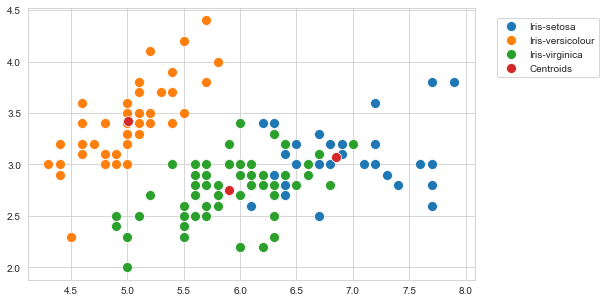

In [123]:
# Visualising the clusters - On the first two columns
plt.figure(figsize = (8,5))
sns.scatterplot(x = feature[y_kmeans == 0, 0],y = feature[y_kmeans == 0, 1], 
             label = 'Iris-setosa', s=100, )
sns.scatterplot(x = feature[y_kmeans == 1, 0], y = feature[y_kmeans == 1, 1], 
             label = 'Iris-versicolour', s=100)
sns.scatterplot(x = feature[y_kmeans == 2, 0], y = feature[y_kmeans == 2, 1],
             label = 'Iris-virginica', s=100)

# Plotting the centroids of the clusters
sns.scatterplot(x = kmeans.cluster_centers_[:, 0], y = kmeans.cluster_centers_[:,1], 
             label = 'Centroids', s=100)

plt.legend(bbox_to_anchor = (1.3,1), borderaxespad = 1)